In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler


In [2]:
# Load the features from the CSV file
df = pd.read_csv(r'Original_Features4.csv')
df


,chroma_stft,spectral_centroid,spectral_bandwidth,rolloff,mfcc,zero_crossing_rate,English Type
0,0.351208,3487.395820,3665.246300,6548.753520,-16.105730,0.085826,0
1,0.518381,4489.976434,4567.835538,9700.060393,-9.443089,0.081952,0
2,0.398508,3484.886038,2659.198168,5587.160014,-16.786263,0.123342,0
3,0.404456,3368.354310,3496.116070,6045.886857,-12.001881,0.099111,1
4,0.402444,1560.972092,1770.163473,2994.105181,-13.093399,0.040951,1
...,...,...,...,...,...,...,...
2133,0.391682,2063.093516,1752.296651,3500.525549,-10.748590,0.071048,0
2134,0.381173,3715.435707,3141.827334,6324.752231,-9.148145,0.107324,0
2135,0.424373,2613.863420,2269.083768,4429.610437,-14.736230,0.090840,0
2136,0.383533,3969.889252,4233.557696,7913.680322,-8.775796,0.122074,0


In [3]:
del df['mfcc']
df

,chroma_stft,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,English Type
0,0.351208,3487.395820,3665.246300,6548.753520,0.085826,0
1,0.518381,4489.976434,4567.835538,9700.060393,0.081952,0
2,0.398508,3484.886038,2659.198168,5587.160014,0.123342,0
3,0.404456,3368.354310,3496.116070,6045.886857,0.099111,1
4,0.402444,1560.972092,1770.163473,2994.105181,0.040951,1
...,...,...,...,...,...,...
2133,0.391682,2063.093516,1752.296651,3500.525549,0.071048,0
2134,0.381173,3715.435707,3141.827334,6324.752231,0.107324,0
2135,0.424373,2613.863420,2269.083768,4429.610437,0.090840,0
2136,0.383533,3969.889252,4233.557696,7913.680322,0.122074,0


In [4]:
X = df.iloc[:,0:5]
y = df.iloc[:,5]


In [5]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
print(X_train.shape,y_train.shape)

# scale data
t = MinMaxScaler()
t.fit(X_train)
X_train = t.transform(X_train)
X_test = t.transform(X_test)

(1432, 5) (1432,)


In [6]:
# Standardize the input features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [7]:
# Define the autoencoder architecture
input_dim = X_train_scaled.shape[1]
encoding_dim = 64
input_layer = Input(shape=(input_dim,))
encoder = Dense(encoding_dim, activation='relu')(input_layer)
decoder = Dense(input_dim, activation='sigmoid')(encoder)
autoencoder = Model(inputs=input_layer, outputs=decoder)
autoencoder.compile(optimizer='rmsprop', loss='mse')

# Train the autoencoder
autoencoder.fit(X_train_scaled, X_train_scaled, epochs=1450, batch_size=42,
                validation_data=(X_test_scaled, X_test_scaled))

# Extract the encoded representations
encoder = Model(inputs=input_layer, outputs=encoder)
X_train_encoded = encoder.predict(X_train_scaled)
X_test_encoded = encoder.predict(X_test_scaled)

Epoch 1/1450
35/35 [==============================] - 1s 12ms/step - loss: 1.0771 - val_loss: 1.0275
Epoch 2/1450
35/35 [==============================] - 0s 4ms/step - loss: 0.8554 - val_loss: 0.8548
Epoch 3/1450
35/35 [==============================] - 0s 6ms/step - loss: 0.7319 - val_loss: 0.7660
Epoch 4/1450
35/35 [==============================] - 0s 4ms/step - loss: 0.6658 - val_loss: 0.7194
Epoch 5/1450
35/35 [==============================] - 0s 5ms/step - loss: 0.6289 - val_loss: 0.6912
Epoch 6/1450
35/35 [==============================] - 0s 4ms/step - loss: 0.6059 - val_loss: 0.6736
Epoch 7/1450
35/35 [==============================] - 0s 5ms/step - loss: 0.5914 - val_loss: 0.6623
Epoch 8/1450
35/35 [==============================] - 0s 4ms/step - loss: 0.5819 - val_loss: 0.6549
Epoch 9/1450
35/35 [==============================] - 0s 4ms/step - loss: 0.5755 - val_loss: 0.6495
Epoch 10/1450
35/35 [==============================] - 0s 5ms/step - loss: 0.5709 - val_loss: 0.646

35/35 [==============================] - 0s 5ms/step - loss: 0.5579 - val_loss: 0.6341
Epoch 83/1450
35/35 [==============================] - 0s 4ms/step - loss: 0.5579 - val_loss: 0.6341
Epoch 84/1450
35/35 [==============================] - 0s 3ms/step - loss: 0.5579 - val_loss: 0.6341
Epoch 85/1450
35/35 [==============================] - 0s 5ms/step - loss: 0.5579 - val_loss: 0.6341
Epoch 86/1450
35/35 [==============================] - 0s 3ms/step - loss: 0.5579 - val_loss: 0.6341
Epoch 87/1450
35/35 [==============================] - 0s 4ms/step - loss: 0.5579 - val_loss: 0.6341
Epoch 88/1450
35/35 [==============================] - 0s 3ms/step - loss: 0.5579 - val_loss: 0.6341
Epoch 89/1450
35/35 [==============================] - 0s 4ms/step - loss: 0.5579 - val_loss: 0.6341
Epoch 90/1450
35/35 [==============================] - 0s 4ms/step - loss: 0.5579 - val_loss: 0.6341
Epoch 91/1450
35/35 [==============================] - 0s 3ms/step - loss: 0.5579 - val_loss: 0.6341
Epoc

35/35 [==============================] - 0s 3ms/step - loss: 0.5575 - val_loss: 0.6338
Epoch 163/1450
35/35 [==============================] - 0s 4ms/step - loss: 0.5575 - val_loss: 0.6337
Epoch 164/1450
35/35 [==============================] - 0s 4ms/step - loss: 0.5575 - val_loss: 0.6337
Epoch 165/1450
35/35 [==============================] - 0s 5ms/step - loss: 0.5575 - val_loss: 0.6337
Epoch 166/1450
35/35 [==============================] - 0s 5ms/step - loss: 0.5575 - val_loss: 0.6336
Epoch 167/1450
35/35 [==============================] - 0s 4ms/step - loss: 0.5575 - val_loss: 0.6337
Epoch 168/1450
35/35 [==============================] - 0s 5ms/step - loss: 0.5574 - val_loss: 0.6337
Epoch 169/1450
35/35 [==============================] - 0s 3ms/step - loss: 0.5574 - val_loss: 0.6337
Epoch 170/1450
35/35 [==============================] - 0s 4ms/step - loss: 0.5574 - val_loss: 0.6337
Epoch 171/1450
35/35 [==============================] - 0s 3ms/step - loss: 0.5574 - val_loss: 0.

35/35 [==============================] - 0s 5ms/step - loss: 0.5572 - val_loss: 0.6335
Epoch 243/1450
35/35 [==============================] - 0s 3ms/step - loss: 0.5572 - val_loss: 0.6334
Epoch 244/1450
35/35 [==============================] - 0s 4ms/step - loss: 0.5572 - val_loss: 0.6335
Epoch 245/1450
35/35 [==============================] - 0s 3ms/step - loss: 0.5572 - val_loss: 0.6335
Epoch 246/1450
35/35 [==============================] - 0s 4ms/step - loss: 0.5572 - val_loss: 0.6335
Epoch 247/1450
35/35 [==============================] - 0s 5ms/step - loss: 0.5572 - val_loss: 0.6335
Epoch 248/1450
35/35 [==============================] - 0s 5ms/step - loss: 0.5572 - val_loss: 0.6334
Epoch 249/1450
35/35 [==============================] - 0s 6ms/step - loss: 0.5572 - val_loss: 0.6334
Epoch 250/1450
35/35 [==============================] - 0s 4ms/step - loss: 0.5572 - val_loss: 0.6335
Epoch 251/1450
35/35 [==============================] - 0s 4ms/step - loss: 0.5572 - val_loss: 0.

35/35 [==============================] - 0s 4ms/step - loss: 0.5571 - val_loss: 0.6333
Epoch 323/1450
35/35 [==============================] - 0s 3ms/step - loss: 0.5570 - val_loss: 0.6333
Epoch 324/1450
35/35 [==============================] - 0s 4ms/step - loss: 0.5570 - val_loss: 0.6333
Epoch 325/1450
35/35 [==============================] - 0s 4ms/step - loss: 0.5570 - val_loss: 0.6333
Epoch 326/1450
35/35 [==============================] - 0s 3ms/step - loss: 0.5570 - val_loss: 0.6333
Epoch 327/1450
35/35 [==============================] - 0s 4ms/step - loss: 0.5570 - val_loss: 0.6333
Epoch 328/1450
35/35 [==============================] - 0s 4ms/step - loss: 0.5570 - val_loss: 0.6333
Epoch 329/1450
35/35 [==============================] - 0s 4ms/step - loss: 0.5570 - val_loss: 0.6333
Epoch 330/1450
35/35 [==============================] - 0s 4ms/step - loss: 0.5570 - val_loss: 0.6333
Epoch 331/1450
35/35 [==============================] - 0s 3ms/step - loss: 0.5570 - val_loss: 0.

35/35 [==============================] - 0s 4ms/step - loss: 0.5569 - val_loss: 0.6331
Epoch 403/1450
35/35 [==============================] - 0s 4ms/step - loss: 0.5569 - val_loss: 0.6332
Epoch 404/1450
35/35 [==============================] - 0s 4ms/step - loss: 0.5569 - val_loss: 0.6332
Epoch 405/1450
35/35 [==============================] - 0s 3ms/step - loss: 0.5569 - val_loss: 0.6332
Epoch 406/1450
35/35 [==============================] - 0s 4ms/step - loss: 0.5569 - val_loss: 0.6332
Epoch 407/1450
35/35 [==============================] - 0s 3ms/step - loss: 0.5569 - val_loss: 0.6332
Epoch 408/1450
35/35 [==============================] - 0s 4ms/step - loss: 0.5569 - val_loss: 0.6331
Epoch 409/1450
35/35 [==============================] - 0s 5ms/step - loss: 0.5569 - val_loss: 0.6331
Epoch 410/1450
35/35 [==============================] - 0s 4ms/step - loss: 0.5569 - val_loss: 0.6331
Epoch 411/1450
35/35 [==============================] - 0s 4ms/step - loss: 0.5569 - val_loss: 0.

35/35 [==============================] - 0s 4ms/step - loss: 0.5568 - val_loss: 0.6330
Epoch 483/1450
35/35 [==============================] - 0s 3ms/step - loss: 0.5568 - val_loss: 0.6330
Epoch 484/1450
35/35 [==============================] - 0s 4ms/step - loss: 0.5568 - val_loss: 0.6330
Epoch 485/1450
35/35 [==============================] - 0s 4ms/step - loss: 0.5568 - val_loss: 0.6330
Epoch 486/1450
35/35 [==============================] - 0s 3ms/step - loss: 0.5568 - val_loss: 0.6330
Epoch 487/1450
35/35 [==============================] - 0s 4ms/step - loss: 0.5568 - val_loss: 0.6331
Epoch 488/1450
35/35 [==============================] - 0s 3ms/step - loss: 0.5568 - val_loss: 0.6330
Epoch 489/1450
35/35 [==============================] - 0s 4ms/step - loss: 0.5568 - val_loss: 0.6330
Epoch 490/1450
35/35 [==============================] - 0s 3ms/step - loss: 0.5568 - val_loss: 0.6330
Epoch 491/1450
35/35 [==============================] - 0s 4ms/step - loss: 0.5568 - val_loss: 0.

35/35 [==============================] - 0s 3ms/step - loss: 0.5567 - val_loss: 0.6329
Epoch 563/1450
35/35 [==============================] - 0s 4ms/step - loss: 0.5567 - val_loss: 0.6330
Epoch 564/1450
35/35 [==============================] - 0s 4ms/step - loss: 0.5567 - val_loss: 0.6329
Epoch 565/1450
35/35 [==============================] - 0s 3ms/step - loss: 0.5567 - val_loss: 0.6330
Epoch 566/1450
35/35 [==============================] - 0s 4ms/step - loss: 0.5567 - val_loss: 0.6329
Epoch 567/1450
35/35 [==============================] - 0s 3ms/step - loss: 0.5567 - val_loss: 0.6329
Epoch 568/1450
35/35 [==============================] - 0s 4ms/step - loss: 0.5567 - val_loss: 0.6330
Epoch 569/1450
35/35 [==============================] - 0s 4ms/step - loss: 0.5567 - val_loss: 0.6330
Epoch 570/1450
35/35 [==============================] - 0s 3ms/step - loss: 0.5567 - val_loss: 0.6330
Epoch 571/1450
35/35 [==============================] - 0s 4ms/step - loss: 0.5567 - val_loss: 0.

35/35 [==============================] - 0s 5ms/step - loss: 0.5566 - val_loss: 0.6329
Epoch 643/1450
35/35 [==============================] - 0s 5ms/step - loss: 0.5566 - val_loss: 0.6328
Epoch 644/1450
35/35 [==============================] - 0s 4ms/step - loss: 0.5566 - val_loss: 0.6329
Epoch 645/1450
35/35 [==============================] - 0s 4ms/step - loss: 0.5566 - val_loss: 0.6329
Epoch 646/1450
35/35 [==============================] - 0s 3ms/step - loss: 0.5566 - val_loss: 0.6329
Epoch 647/1450
35/35 [==============================] - 0s 5ms/step - loss: 0.5566 - val_loss: 0.6329
Epoch 648/1450
35/35 [==============================] - 0s 5ms/step - loss: 0.5566 - val_loss: 0.6329
Epoch 649/1450
35/35 [==============================] - 0s 5ms/step - loss: 0.5566 - val_loss: 0.6329
Epoch 650/1450
35/35 [==============================] - 0s 4ms/step - loss: 0.5566 - val_loss: 0.6329
Epoch 651/1450
35/35 [==============================] - 0s 3ms/step - loss: 0.5566 - val_loss: 0.

35/35 [==============================] - 0s 4ms/step - loss: 0.5566 - val_loss: 0.6328
Epoch 723/1450
35/35 [==============================] - 0s 3ms/step - loss: 0.5566 - val_loss: 0.6329
Epoch 724/1450
35/35 [==============================] - 0s 4ms/step - loss: 0.5566 - val_loss: 0.6328
Epoch 725/1450
35/35 [==============================] - 0s 4ms/step - loss: 0.5566 - val_loss: 0.6328
Epoch 726/1450
35/35 [==============================] - 0s 5ms/step - loss: 0.5566 - val_loss: 0.6328
Epoch 727/1450
35/35 [==============================] - 0s 5ms/step - loss: 0.5566 - val_loss: 0.6328
Epoch 728/1450
35/35 [==============================] - 0s 4ms/step - loss: 0.5566 - val_loss: 0.6328
Epoch 729/1450
35/35 [==============================] - 0s 4ms/step - loss: 0.5566 - val_loss: 0.6328
Epoch 730/1450
35/35 [==============================] - 0s 3ms/step - loss: 0.5566 - val_loss: 0.6328
Epoch 731/1450
35/35 [==============================] - 0s 4ms/step - loss: 0.5566 - val_loss: 0.

35/35 [==============================] - 0s 4ms/step - loss: 0.5565 - val_loss: 0.6327
Epoch 803/1450
35/35 [==============================] - 0s 4ms/step - loss: 0.5565 - val_loss: 0.6328
Epoch 804/1450
35/35 [==============================] - 0s 5ms/step - loss: 0.5565 - val_loss: 0.6328
Epoch 805/1450
35/35 [==============================] - 0s 4ms/step - loss: 0.5565 - val_loss: 0.6327
Epoch 806/1450
35/35 [==============================] - 0s 5ms/step - loss: 0.5565 - val_loss: 0.6327
Epoch 807/1450
35/35 [==============================] - 0s 5ms/step - loss: 0.5565 - val_loss: 0.6327
Epoch 808/1450
35/35 [==============================] - 0s 4ms/step - loss: 0.5565 - val_loss: 0.6328
Epoch 809/1450
35/35 [==============================] - 0s 5ms/step - loss: 0.5565 - val_loss: 0.6328
Epoch 810/1450
35/35 [==============================] - 0s 4ms/step - loss: 0.5565 - val_loss: 0.6327
Epoch 811/1450
35/35 [==============================] - 0s 5ms/step - loss: 0.5565 - val_loss: 0.

35/35 [==============================] - 0s 4ms/step - loss: 0.5565 - val_loss: 0.6327
Epoch 883/1450
35/35 [==============================] - 0s 5ms/step - loss: 0.5565 - val_loss: 0.6328
Epoch 884/1450
35/35 [==============================] - 0s 5ms/step - loss: 0.5565 - val_loss: 0.6327
Epoch 885/1450
35/35 [==============================] - 0s 5ms/step - loss: 0.5565 - val_loss: 0.6328
Epoch 886/1450
35/35 [==============================] - 0s 3ms/step - loss: 0.5565 - val_loss: 0.6327
Epoch 887/1450
35/35 [==============================] - 0s 4ms/step - loss: 0.5565 - val_loss: 0.6327
Epoch 888/1450
35/35 [==============================] - 0s 4ms/step - loss: 0.5565 - val_loss: 0.6327
Epoch 889/1450
35/35 [==============================] - 0s 4ms/step - loss: 0.5565 - val_loss: 0.6327
Epoch 890/1450
35/35 [==============================] - 0s 4ms/step - loss: 0.5565 - val_loss: 0.6327
Epoch 891/1450
35/35 [==============================] - 0s 4ms/step - loss: 0.5565 - val_loss: 0.

35/35 [==============================] - 0s 4ms/step - loss: 0.5564 - val_loss: 0.6326
Epoch 963/1450
35/35 [==============================] - 0s 3ms/step - loss: 0.5564 - val_loss: 0.6327
Epoch 964/1450
35/35 [==============================] - 0s 4ms/step - loss: 0.5564 - val_loss: 0.6327
Epoch 965/1450
35/35 [==============================] - 0s 3ms/step - loss: 0.5564 - val_loss: 0.6327
Epoch 966/1450
35/35 [==============================] - 0s 3ms/step - loss: 0.5564 - val_loss: 0.6326
Epoch 967/1450
35/35 [==============================] - 0s 4ms/step - loss: 0.5564 - val_loss: 0.6326
Epoch 968/1450
35/35 [==============================] - 0s 3ms/step - loss: 0.5564 - val_loss: 0.6327
Epoch 969/1450
35/35 [==============================] - 0s 4ms/step - loss: 0.5564 - val_loss: 0.6327
Epoch 970/1450
35/35 [==============================] - 0s 3ms/step - loss: 0.5564 - val_loss: 0.6326
Epoch 971/1450
35/35 [==============================] - 0s 4ms/step - loss: 0.5564 - val_loss: 0.

35/35 [==============================] - 0s 4ms/step - loss: 0.5564 - val_loss: 0.6326
Epoch 1043/1450
35/35 [==============================] - 0s 3ms/step - loss: 0.5564 - val_loss: 0.6326
Epoch 1044/1450
35/35 [==============================] - 0s 4ms/step - loss: 0.5564 - val_loss: 0.6326
Epoch 1045/1450
35/35 [==============================] - 0s 3ms/step - loss: 0.5564 - val_loss: 0.6326
Epoch 1046/1450
35/35 [==============================] - 0s 4ms/step - loss: 0.5564 - val_loss: 0.6326
Epoch 1047/1450
35/35 [==============================] - 0s 4ms/step - loss: 0.5564 - val_loss: 0.6326
Epoch 1048/1450
35/35 [==============================] - 0s 4ms/step - loss: 0.5564 - val_loss: 0.6326
Epoch 1049/1450
35/35 [==============================] - 0s 4ms/step - loss: 0.5564 - val_loss: 0.6326
Epoch 1050/1450
35/35 [==============================] - 0s 3ms/step - loss: 0.5564 - val_loss: 0.6327
Epoch 1051/1450
35/35 [==============================] - 0s 4ms/step - loss: 0.5564 - val

35/35 [==============================] - 0s 4ms/step - loss: 0.5564 - val_loss: 0.6326
Epoch 1122/1450
35/35 [==============================] - 0s 3ms/step - loss: 0.5564 - val_loss: 0.6326
Epoch 1123/1450
35/35 [==============================] - 0s 4ms/step - loss: 0.5564 - val_loss: 0.6325
Epoch 1124/1450
35/35 [==============================] - 0s 3ms/step - loss: 0.5564 - val_loss: 0.6326
Epoch 1125/1450
35/35 [==============================] - 0s 3ms/step - loss: 0.5564 - val_loss: 0.6326
Epoch 1126/1450
35/35 [==============================] - 0s 4ms/step - loss: 0.5564 - val_loss: 0.6326
Epoch 1127/1450
35/35 [==============================] - 0s 3ms/step - loss: 0.5563 - val_loss: 0.6326
Epoch 1128/1450
35/35 [==============================] - 0s 4ms/step - loss: 0.5563 - val_loss: 0.6326
Epoch 1129/1450
35/35 [==============================] - 0s 3ms/step - loss: 0.5563 - val_loss: 0.6326
Epoch 1130/1450
35/35 [==============================] - 0s 4ms/step - loss: 0.5563 - val

35/35 [==============================] - 0s 4ms/step - loss: 0.5563 - val_loss: 0.6325
Epoch 1201/1450
35/35 [==============================] - 0s 3ms/step - loss: 0.5563 - val_loss: 0.6325
Epoch 1202/1450
35/35 [==============================] - 0s 4ms/step - loss: 0.5563 - val_loss: 0.6325
Epoch 1203/1450
35/35 [==============================] - 0s 4ms/step - loss: 0.5563 - val_loss: 0.6325
Epoch 1204/1450
35/35 [==============================] - 0s 3ms/step - loss: 0.5563 - val_loss: 0.6325
Epoch 1205/1450
35/35 [==============================] - 0s 4ms/step - loss: 0.5563 - val_loss: 0.6325
Epoch 1206/1450
35/35 [==============================] - 0s 3ms/step - loss: 0.5563 - val_loss: 0.6325
Epoch 1207/1450
35/35 [==============================] - 0s 4ms/step - loss: 0.5563 - val_loss: 0.6325
Epoch 1208/1450
35/35 [==============================] - 0s 4ms/step - loss: 0.5563 - val_loss: 0.6325
Epoch 1209/1450
35/35 [==============================] - 0s 3ms/step - loss: 0.5563 - val

35/35 [==============================] - 0s 3ms/step - loss: 0.5562 - val_loss: 0.6324
Epoch 1280/1450
35/35 [==============================] - 0s 4ms/step - loss: 0.5562 - val_loss: 0.6324
Epoch 1281/1450
35/35 [==============================] - 0s 3ms/step - loss: 0.5562 - val_loss: 0.6325
Epoch 1282/1450
35/35 [==============================] - 0s 4ms/step - loss: 0.5562 - val_loss: 0.6325
Epoch 1283/1450
35/35 [==============================] - 0s 4ms/step - loss: 0.5562 - val_loss: 0.6325
Epoch 1284/1450
35/35 [==============================] - 0s 3ms/step - loss: 0.5562 - val_loss: 0.6324
Epoch 1285/1450
35/35 [==============================] - 0s 4ms/step - loss: 0.5562 - val_loss: 0.6324
Epoch 1286/1450
35/35 [==============================] - 0s 3ms/step - loss: 0.5562 - val_loss: 0.6324
Epoch 1287/1450
35/35 [==============================] - 0s 4ms/step - loss: 0.5562 - val_loss: 0.6324
Epoch 1288/1450
35/35 [==============================] - 0s 4ms/step - loss: 0.5562 - val

35/35 [==============================] - 0s 3ms/step - loss: 0.5562 - val_loss: 0.6324
Epoch 1359/1450
35/35 [==============================] - 0s 3ms/step - loss: 0.5562 - val_loss: 0.6324
Epoch 1360/1450
35/35 [==============================] - 0s 4ms/step - loss: 0.5562 - val_loss: 0.6324
Epoch 1361/1450
35/35 [==============================] - 0s 3ms/step - loss: 0.5562 - val_loss: 0.6325
Epoch 1362/1450
35/35 [==============================] - 0s 4ms/step - loss: 0.5562 - val_loss: 0.6324
Epoch 1363/1450
35/35 [==============================] - 0s 4ms/step - loss: 0.5562 - val_loss: 0.6324
Epoch 1364/1450
35/35 [==============================] - 0s 3ms/step - loss: 0.5562 - val_loss: 0.6324
Epoch 1365/1450
35/35 [==============================] - 0s 4ms/step - loss: 0.5562 - val_loss: 0.6324
Epoch 1366/1450
35/35 [==============================] - 0s 3ms/step - loss: 0.5562 - val_loss: 0.6324
Epoch 1367/1450
35/35 [==============================] - 0s 4ms/step - loss: 0.5562 - val

35/35 [==============================] - 0s 4ms/step - loss: 0.5562 - val_loss: 0.6324
Epoch 1438/1450
35/35 [==============================] - 0s 3ms/step - loss: 0.5562 - val_loss: 0.6324
Epoch 1439/1450
35/35 [==============================] - 0s 4ms/step - loss: 0.5562 - val_loss: 0.6324
Epoch 1440/1450
35/35 [==============================] - 0s 4ms/step - loss: 0.5562 - val_loss: 0.6324
Epoch 1441/1450
35/35 [==============================] - 0s 3ms/step - loss: 0.5562 - val_loss: 0.6324
Epoch 1442/1450
35/35 [==============================] - 0s 4ms/step - loss: 0.5562 - val_loss: 0.6324
Epoch 1443/1450
35/35 [==============================] - 0s 4ms/step - loss: 0.5562 - val_loss: 0.6324
Epoch 1444/1450
35/35 [==============================] - 0s 4ms/step - loss: 0.5562 - val_loss: 0.6324
Epoch 1445/1450
35/35 [==============================] - 0s 4ms/step - loss: 0.5562 - val_loss: 0.6324
Epoch 1446/1450
35/35 [==============================] - 0s 3ms/step - loss: 0.5562 - val

In [8]:
#Train a classifier
from sklearn.svm import SVC
clf = SVC(kernel='rbf', C=100.0)
clf.fit(X_train_encoded, y_train)

# Evaluate the performance
y_pred = clf.predict(X_test_encoded)

print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Precision: ", precision_score(y_test, y_pred, average='weighted'))
print("Recall: ", recall_score(y_test, y_pred, average='weighted'))
print("F1-score: ", f1_score(y_test, y_pred, average='weighted'))


import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix, classification_report
import warnings

# Print classification report
print(classification_report(y_test, y_pred))

Accuracy:  0.8328611898016998
Precision:  0.7335534424719038
Recall:  0.8328611898016998
F1-score:  0.7633709440239491
              precision    recall  f1-score   support

           0       0.84      0.99      0.91       591
           1       0.20      0.01      0.02       115

    accuracy                           0.83       706
   macro avg       0.52      0.50      0.46       706
weighted avg       0.73      0.83      0.76       706



In [9]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


model = XGBClassifier()
history = model.fit(X_train_encoded, y_train)
#print(model)

y_pred = model.predict(X_test_encoded)
predictions = [round(value) for value in y_pred]

# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 81.59%


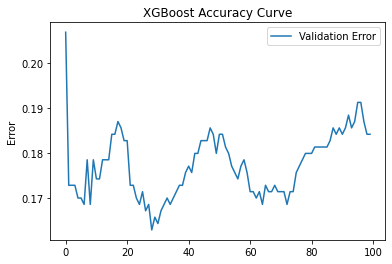

In [10]:
# Train the model and evaluate the accuracy on the validation set after each boosting round
results = model.fit(X_train_encoded, y_train, eval_set=[(X_test_encoded, y_test)], eval_metric='error', verbose=False)

# Plot the accuracy curve
epochs = len(results.evals_result()['validation_0']['error'])
x_axis = range(0, epochs)
fig, ax = plt.subplots()
ax.plot(x_axis, results.evals_result()['validation_0']['error'], label='Validation Error')
ax.legend()
plt.ylabel('Error')
plt.title('XGBoost Accuracy Curve')
plt.show()

# CNN

In [11]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from keras.callbacks import EarlyStopping

In [12]:
# Load the features from the CSV file
df = pd.read_csv(r'Original_Features4.csv')
del df['mfcc']
df


,chroma_stft,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,English Type
0,0.351208,3487.395820,3665.246300,6548.753520,0.085826,0
1,0.518381,4489.976434,4567.835538,9700.060393,0.081952,0
2,0.398508,3484.886038,2659.198168,5587.160014,0.123342,0
3,0.404456,3368.354310,3496.116070,6045.886857,0.099111,1
4,0.402444,1560.972092,1770.163473,2994.105181,0.040951,1
...,...,...,...,...,...,...
2133,0.391682,2063.093516,1752.296651,3500.525549,0.071048,0
2134,0.381173,3715.435707,3141.827334,6324.752231,0.107324,0
2135,0.424373,2613.863420,2269.083768,4429.610437,0.090840,0
2136,0.383533,3969.889252,4233.557696,7913.680322,0.122074,0


In [21]:
# Split the data into training and testing sets

X = df.iloc[:,0:5]
y = df.iloc[:,5]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [22]:
# Convert the accent labels to integers
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Convert the accent labels to one-hot vectors
num_classes = len(np.unique(y_train_encoded))
y_train_onehot = to_categorical(y_train_encoded, num_classes)
y_test_onehot = to_categorical(y_test_encoded, num_classes)

# Reshape the input features for the CNN
n_timesteps, n_features = X_train.shape[1], 1
X_train_reshaped = X_train.values.reshape((X_train.shape[0], n_timesteps, n_features))
X_test_reshaped = X_test.values.reshape((X_test.shape[0], n_timesteps, n_features))


In [23]:
# Define the CNN architecture
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(n_timesteps, n_features)))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=1))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])



In [24]:
# Train the CNN
#es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
history = model.fit(X_train_reshaped, y_train_onehot, epochs=1500, batch_size=42,
                    validation_data=(X_test_reshaped, y_test_onehot))


Epoch 1/1500
41/41 [==============================] - 2s 12ms/step - loss: 17.8724 - accuracy: 0.7041 - val_loss: 1.3761 - val_accuracy: 0.3107
Epoch 2/1500
41/41 [==============================] - 0s 4ms/step - loss: 0.8656 - accuracy: 0.7860 - val_loss: 0.5998 - val_accuracy: 0.8294
Epoch 3/1500
41/41 [==============================] - 0s 5ms/step - loss: 0.7183 - accuracy: 0.8234 - val_loss: 0.5325 - val_accuracy: 0.8294
Epoch 4/1500
41/41 [==============================] - 0s 4ms/step - loss: 0.5278 - accuracy: 0.8193 - val_loss: 0.4845 - val_accuracy: 0.8294
Epoch 5/1500
41/41 [==============================] - 0s 5ms/step - loss: 0.4767 - accuracy: 0.8246 - val_loss: 0.4612 - val_accuracy: 0.8294
Epoch 6/1500
41/41 [==============================] - 0s 4ms/step - loss: 0.5261 - accuracy: 0.8246 - val_loss: 0.4578 - val_accuracy: 0.8294
Epoch 7/1500
41/41 [==============================] - 0s 5ms/step - loss: 0.4666 - accuracy: 0.8240 - val_loss: 0.4569 - val_accuracy: 0.8294
Epoc

41/41 [==============================] - 0s 4ms/step - loss: 0.4649 - accuracy: 0.8246 - val_loss: 0.4568 - val_accuracy: 0.8294
Epoch 59/1500
41/41 [==============================] - 0s 4ms/step - loss: 0.4648 - accuracy: 0.8246 - val_loss: 0.4570 - val_accuracy: 0.8294
Epoch 60/1500
41/41 [==============================] - 0s 4ms/step - loss: 0.4648 - accuracy: 0.8246 - val_loss: 0.4568 - val_accuracy: 0.8294
Epoch 61/1500
41/41 [==============================] - 0s 4ms/step - loss: 0.4652 - accuracy: 0.8246 - val_loss: 0.4568 - val_accuracy: 0.8294
Epoch 62/1500
41/41 [==============================] - 0s 4ms/step - loss: 0.4650 - accuracy: 0.8246 - val_loss: 0.4570 - val_accuracy: 0.8294
Epoch 63/1500
41/41 [==============================] - 0s 4ms/step - loss: 0.4648 - accuracy: 0.8246 - val_loss: 0.4568 - val_accuracy: 0.8294
Epoch 64/1500
41/41 [==============================] - 0s 4ms/step - loss: 0.4649 - accuracy: 0.8246 - val_loss: 0.4568 - val_accuracy: 0.8294
Epoch 65/1500

41/41 [==============================] - 0s 6ms/step - loss: 0.4648 - accuracy: 0.8246 - val_loss: 0.4568 - val_accuracy: 0.8294
Epoch 116/1500
41/41 [==============================] - 0s 6ms/step - loss: 0.4649 - accuracy: 0.8246 - val_loss: 0.4572 - val_accuracy: 0.8294
Epoch 117/1500
41/41 [==============================] - 0s 5ms/step - loss: 0.4650 - accuracy: 0.8246 - val_loss: 0.4571 - val_accuracy: 0.8294
Epoch 118/1500
41/41 [==============================] - 0s 4ms/step - loss: 0.4649 - accuracy: 0.8246 - val_loss: 0.4571 - val_accuracy: 0.8294
Epoch 119/1500
41/41 [==============================] - 0s 6ms/step - loss: 0.4649 - accuracy: 0.8246 - val_loss: 0.4568 - val_accuracy: 0.8294
Epoch 120/1500
41/41 [==============================] - 0s 4ms/step - loss: 0.4648 - accuracy: 0.8246 - val_loss: 0.4568 - val_accuracy: 0.8294
Epoch 121/1500
41/41 [==============================] - 0s 4ms/step - loss: 0.4642 - accuracy: 0.8246 - val_loss: 0.4581 - val_accuracy: 0.8294
Epoch 1

Epoch 172/1500
41/41 [==============================] - 0s 5ms/step - loss: 0.4645 - accuracy: 0.8246 - val_loss: 0.4580 - val_accuracy: 0.8294
Epoch 173/1500
41/41 [==============================] - 0s 4ms/step - loss: 0.4651 - accuracy: 0.8246 - val_loss: 0.4568 - val_accuracy: 0.8294
Epoch 174/1500
41/41 [==============================] - 0s 4ms/step - loss: 0.4649 - accuracy: 0.8246 - val_loss: 0.4569 - val_accuracy: 0.8294
Epoch 175/1500
41/41 [==============================] - 0s 4ms/step - loss: 0.4645 - accuracy: 0.8246 - val_loss: 0.4572 - val_accuracy: 0.8294
Epoch 176/1500
41/41 [==============================] - 0s 4ms/step - loss: 0.4648 - accuracy: 0.8246 - val_loss: 0.4569 - val_accuracy: 0.8294
Epoch 177/1500
41/41 [==============================] - 0s 5ms/step - loss: 0.4650 - accuracy: 0.8246 - val_loss: 0.4569 - val_accuracy: 0.8294
Epoch 178/1500
41/41 [==============================] - 0s 4ms/step - loss: 0.4647 - accuracy: 0.8246 - val_loss: 0.4569 - val_accuracy:

Epoch 229/1500
41/41 [==============================] - 0s 4ms/step - loss: 0.4650 - accuracy: 0.8246 - val_loss: 0.4575 - val_accuracy: 0.8294
Epoch 230/1500
41/41 [==============================] - 0s 4ms/step - loss: 0.4651 - accuracy: 0.8246 - val_loss: 0.4568 - val_accuracy: 0.8294
Epoch 231/1500
41/41 [==============================] - 0s 4ms/step - loss: 0.4651 - accuracy: 0.8246 - val_loss: 0.4569 - val_accuracy: 0.8294
Epoch 232/1500
41/41 [==============================] - 0s 4ms/step - loss: 0.4648 - accuracy: 0.8246 - val_loss: 0.4569 - val_accuracy: 0.8294
Epoch 233/1500
41/41 [==============================] - 0s 4ms/step - loss: 0.4648 - accuracy: 0.8246 - val_loss: 0.4568 - val_accuracy: 0.8294
Epoch 234/1500
41/41 [==============================] - 0s 4ms/step - loss: 0.4648 - accuracy: 0.8246 - val_loss: 0.4571 - val_accuracy: 0.8294
Epoch 235/1500
41/41 [==============================] - 0s 4ms/step - loss: 0.4650 - accuracy: 0.8246 - val_loss: 0.4568 - val_accuracy:

Epoch 286/1500
41/41 [==============================] - 0s 5ms/step - loss: 0.4650 - accuracy: 0.8246 - val_loss: 0.4571 - val_accuracy: 0.8294
Epoch 287/1500
41/41 [==============================] - 0s 5ms/step - loss: 0.4648 - accuracy: 0.8246 - val_loss: 0.4568 - val_accuracy: 0.8294
Epoch 288/1500
41/41 [==============================] - 0s 6ms/step - loss: 0.4652 - accuracy: 0.8246 - val_loss: 0.4569 - val_accuracy: 0.8294
Epoch 289/1500
41/41 [==============================] - 0s 5ms/step - loss: 0.4650 - accuracy: 0.8246 - val_loss: 0.4568 - val_accuracy: 0.8294
Epoch 290/1500
41/41 [==============================] - 0s 5ms/step - loss: 0.4649 - accuracy: 0.8246 - val_loss: 0.4572 - val_accuracy: 0.8294
Epoch 291/1500
41/41 [==============================] - 0s 5ms/step - loss: 0.4650 - accuracy: 0.8246 - val_loss: 0.4568 - val_accuracy: 0.8294
Epoch 292/1500
41/41 [==============================] - 0s 5ms/step - loss: 0.4646 - accuracy: 0.8246 - val_loss: 0.4572 - val_accuracy:

Epoch 343/1500
41/41 [==============================] - 0s 4ms/step - loss: 0.4649 - accuracy: 0.8246 - val_loss: 0.4568 - val_accuracy: 0.8294
Epoch 344/1500
41/41 [==============================] - 0s 5ms/step - loss: 0.4650 - accuracy: 0.8246 - val_loss: 0.4568 - val_accuracy: 0.8294
Epoch 345/1500
41/41 [==============================] - 0s 5ms/step - loss: 0.4643 - accuracy: 0.8246 - val_loss: 0.4570 - val_accuracy: 0.8294
Epoch 346/1500
41/41 [==============================] - 0s 5ms/step - loss: 0.4650 - accuracy: 0.8246 - val_loss: 0.4568 - val_accuracy: 0.8294
Epoch 347/1500
41/41 [==============================] - 0s 5ms/step - loss: 0.4644 - accuracy: 0.8246 - val_loss: 0.4571 - val_accuracy: 0.8294
Epoch 348/1500
41/41 [==============================] - 0s 5ms/step - loss: 0.4651 - accuracy: 0.8246 - val_loss: 0.4568 - val_accuracy: 0.8294
Epoch 349/1500
41/41 [==============================] - 0s 5ms/step - loss: 0.4648 - accuracy: 0.8246 - val_loss: 0.4571 - val_accuracy:

Epoch 400/1500
41/41 [==============================] - 0s 6ms/step - loss: 0.4649 - accuracy: 0.8246 - val_loss: 0.4568 - val_accuracy: 0.8294
Epoch 401/1500
41/41 [==============================] - 0s 5ms/step - loss: 0.4650 - accuracy: 0.8246 - val_loss: 0.4569 - val_accuracy: 0.8294
Epoch 402/1500
41/41 [==============================] - 0s 5ms/step - loss: 0.4649 - accuracy: 0.8246 - val_loss: 0.4571 - val_accuracy: 0.8294
Epoch 403/1500
41/41 [==============================] - 0s 4ms/step - loss: 0.4651 - accuracy: 0.8246 - val_loss: 0.4569 - val_accuracy: 0.8294
Epoch 404/1500
41/41 [==============================] - 0s 5ms/step - loss: 0.4651 - accuracy: 0.8246 - val_loss: 0.4568 - val_accuracy: 0.8294
Epoch 405/1500
41/41 [==============================] - 0s 4ms/step - loss: 0.4647 - accuracy: 0.8246 - val_loss: 0.4573 - val_accuracy: 0.8294
Epoch 406/1500
41/41 [==============================] - 0s 5ms/step - loss: 0.4648 - accuracy: 0.8246 - val_loss: 0.4568 - val_accuracy:

Epoch 457/1500
41/41 [==============================] - 0s 4ms/step - loss: 0.4648 - accuracy: 0.8246 - val_loss: 0.4569 - val_accuracy: 0.8294
Epoch 458/1500
41/41 [==============================] - 0s 4ms/step - loss: 0.4649 - accuracy: 0.8246 - val_loss: 0.4572 - val_accuracy: 0.8294
Epoch 459/1500
41/41 [==============================] - 0s 4ms/step - loss: 0.4651 - accuracy: 0.8246 - val_loss: 0.4569 - val_accuracy: 0.8294
Epoch 460/1500
41/41 [==============================] - 0s 5ms/step - loss: 0.4649 - accuracy: 0.8246 - val_loss: 0.4569 - val_accuracy: 0.8294
Epoch 461/1500
41/41 [==============================] - 0s 4ms/step - loss: 0.4650 - accuracy: 0.8246 - val_loss: 0.4570 - val_accuracy: 0.8294
Epoch 462/1500
41/41 [==============================] - 0s 4ms/step - loss: 0.4647 - accuracy: 0.8246 - val_loss: 0.4568 - val_accuracy: 0.8294
Epoch 463/1500
41/41 [==============================] - 0s 4ms/step - loss: 0.4648 - accuracy: 0.8246 - val_loss: 0.4569 - val_accuracy:

Epoch 514/1500
41/41 [==============================] - 0s 5ms/step - loss: 0.4648 - accuracy: 0.8246 - val_loss: 0.4571 - val_accuracy: 0.8294
Epoch 515/1500
41/41 [==============================] - 0s 4ms/step - loss: 0.4646 - accuracy: 0.8246 - val_loss: 0.4575 - val_accuracy: 0.8294
Epoch 516/1500
41/41 [==============================] - 0s 5ms/step - loss: 0.4652 - accuracy: 0.8246 - val_loss: 0.4570 - val_accuracy: 0.8294
Epoch 517/1500
41/41 [==============================] - 0s 4ms/step - loss: 0.4648 - accuracy: 0.8246 - val_loss: 0.4570 - val_accuracy: 0.8294
Epoch 518/1500
41/41 [==============================] - 0s 5ms/step - loss: 0.4650 - accuracy: 0.8246 - val_loss: 0.4568 - val_accuracy: 0.8294
Epoch 519/1500
41/41 [==============================] - 0s 4ms/step - loss: 0.4648 - accuracy: 0.8246 - val_loss: 0.4570 - val_accuracy: 0.8294
Epoch 520/1500
41/41 [==============================] - 0s 5ms/step - loss: 0.4645 - accuracy: 0.8246 - val_loss: 0.4568 - val_accuracy:

Epoch 571/1500
41/41 [==============================] - 0s 7ms/step - loss: 0.4648 - accuracy: 0.8246 - val_loss: 0.4568 - val_accuracy: 0.8294
Epoch 572/1500
41/41 [==============================] - 0s 6ms/step - loss: 0.4648 - accuracy: 0.8246 - val_loss: 0.4570 - val_accuracy: 0.8294
Epoch 573/1500
41/41 [==============================] - 0s 5ms/step - loss: 0.4652 - accuracy: 0.8246 - val_loss: 0.4568 - val_accuracy: 0.8294
Epoch 574/1500
41/41 [==============================] - 0s 6ms/step - loss: 0.4647 - accuracy: 0.8246 - val_loss: 0.4568 - val_accuracy: 0.8294
Epoch 575/1500
41/41 [==============================] - 0s 5ms/step - loss: 0.4649 - accuracy: 0.8246 - val_loss: 0.4568 - val_accuracy: 0.8294
Epoch 576/1500
41/41 [==============================] - 0s 6ms/step - loss: 0.4649 - accuracy: 0.8246 - val_loss: 0.4570 - val_accuracy: 0.8294
Epoch 577/1500
41/41 [==============================] - 0s 4ms/step - loss: 0.4646 - accuracy: 0.8246 - val_loss: 0.4568 - val_accuracy:

Epoch 628/1500
41/41 [==============================] - 0s 4ms/step - loss: 0.4648 - accuracy: 0.8246 - val_loss: 0.4568 - val_accuracy: 0.8294
Epoch 629/1500
41/41 [==============================] - 0s 4ms/step - loss: 0.4648 - accuracy: 0.8246 - val_loss: 0.4568 - val_accuracy: 0.8294
Epoch 630/1500
41/41 [==============================] - 0s 4ms/step - loss: 0.4649 - accuracy: 0.8246 - val_loss: 0.4569 - val_accuracy: 0.8294
Epoch 631/1500
41/41 [==============================] - 0s 4ms/step - loss: 0.4649 - accuracy: 0.8246 - val_loss: 0.4569 - val_accuracy: 0.8294
Epoch 632/1500
41/41 [==============================] - 0s 4ms/step - loss: 0.4649 - accuracy: 0.8246 - val_loss: 0.4568 - val_accuracy: 0.8294
Epoch 633/1500
41/41 [==============================] - 0s 5ms/step - loss: 0.4649 - accuracy: 0.8246 - val_loss: 0.4569 - val_accuracy: 0.8294
Epoch 634/1500
41/41 [==============================] - 0s 4ms/step - loss: 0.4649 - accuracy: 0.8246 - val_loss: 0.4570 - val_accuracy:

Epoch 685/1500
41/41 [==============================] - 0s 5ms/step - loss: 0.4647 - accuracy: 0.8246 - val_loss: 0.4568 - val_accuracy: 0.8294
Epoch 686/1500
41/41 [==============================] - 0s 4ms/step - loss: 0.4649 - accuracy: 0.8246 - val_loss: 0.4568 - val_accuracy: 0.8294
Epoch 687/1500
41/41 [==============================] - 0s 5ms/step - loss: 0.4650 - accuracy: 0.8246 - val_loss: 0.4568 - val_accuracy: 0.8294
Epoch 688/1500
41/41 [==============================] - 0s 4ms/step - loss: 0.4650 - accuracy: 0.8246 - val_loss: 0.4568 - val_accuracy: 0.8294
Epoch 689/1500
41/41 [==============================] - 0s 5ms/step - loss: 0.4649 - accuracy: 0.8246 - val_loss: 0.4568 - val_accuracy: 0.8294
Epoch 690/1500
41/41 [==============================] - 0s 4ms/step - loss: 0.4648 - accuracy: 0.8246 - val_loss: 0.4569 - val_accuracy: 0.8294
Epoch 691/1500
41/41 [==============================] - 0s 4ms/step - loss: 0.4649 - accuracy: 0.8246 - val_loss: 0.4569 - val_accuracy:

Epoch 742/1500
41/41 [==============================] - 0s 4ms/step - loss: 0.4649 - accuracy: 0.8246 - val_loss: 0.4569 - val_accuracy: 0.8294
Epoch 743/1500
41/41 [==============================] - 0s 4ms/step - loss: 0.4649 - accuracy: 0.8246 - val_loss: 0.4570 - val_accuracy: 0.8294
Epoch 744/1500
41/41 [==============================] - 0s 5ms/step - loss: 0.4648 - accuracy: 0.8246 - val_loss: 0.4568 - val_accuracy: 0.8294
Epoch 745/1500
41/41 [==============================] - 0s 4ms/step - loss: 0.4651 - accuracy: 0.8246 - val_loss: 0.4568 - val_accuracy: 0.8294
Epoch 746/1500
41/41 [==============================] - 0s 5ms/step - loss: 0.4647 - accuracy: 0.8246 - val_loss: 0.4570 - val_accuracy: 0.8294
Epoch 747/1500
41/41 [==============================] - 0s 4ms/step - loss: 0.4648 - accuracy: 0.8246 - val_loss: 0.4568 - val_accuracy: 0.8294
Epoch 748/1500
41/41 [==============================] - 0s 5ms/step - loss: 0.4647 - accuracy: 0.8246 - val_loss: 0.4571 - val_accuracy:

Epoch 799/1500
41/41 [==============================] - 0s 4ms/step - loss: 0.4650 - accuracy: 0.8246 - val_loss: 0.4568 - val_accuracy: 0.8294
Epoch 800/1500
41/41 [==============================] - 0s 5ms/step - loss: 0.4649 - accuracy: 0.8246 - val_loss: 0.4569 - val_accuracy: 0.8294
Epoch 801/1500
41/41 [==============================] - 0s 4ms/step - loss: 0.4649 - accuracy: 0.8246 - val_loss: 0.4570 - val_accuracy: 0.8294
Epoch 802/1500
41/41 [==============================] - 0s 4ms/step - loss: 0.4647 - accuracy: 0.8246 - val_loss: 0.4568 - val_accuracy: 0.8294
Epoch 803/1500
41/41 [==============================] - 0s 4ms/step - loss: 0.4647 - accuracy: 0.8246 - val_loss: 0.4569 - val_accuracy: 0.8294
Epoch 804/1500
41/41 [==============================] - 0s 4ms/step - loss: 0.4649 - accuracy: 0.8246 - val_loss: 0.4568 - val_accuracy: 0.8294
Epoch 805/1500
41/41 [==============================] - 0s 4ms/step - loss: 0.4651 - accuracy: 0.8246 - val_loss: 0.4569 - val_accuracy:

Epoch 856/1500
41/41 [==============================] - 0s 4ms/step - loss: 0.4648 - accuracy: 0.8246 - val_loss: 0.4569 - val_accuracy: 0.8294
Epoch 857/1500
41/41 [==============================] - 0s 5ms/step - loss: 0.4648 - accuracy: 0.8246 - val_loss: 0.4568 - val_accuracy: 0.8294
Epoch 858/1500
41/41 [==============================] - 0s 4ms/step - loss: 0.4650 - accuracy: 0.8246 - val_loss: 0.4568 - val_accuracy: 0.8294
Epoch 859/1500
41/41 [==============================] - 0s 5ms/step - loss: 0.4647 - accuracy: 0.8246 - val_loss: 0.4568 - val_accuracy: 0.8294
Epoch 860/1500
41/41 [==============================] - 0s 4ms/step - loss: 0.4648 - accuracy: 0.8246 - val_loss: 0.4573 - val_accuracy: 0.8294
Epoch 861/1500
41/41 [==============================] - 0s 5ms/step - loss: 0.4647 - accuracy: 0.8246 - val_loss: 0.4568 - val_accuracy: 0.8294
Epoch 862/1500
41/41 [==============================] - 0s 4ms/step - loss: 0.4648 - accuracy: 0.8246 - val_loss: 0.4568 - val_accuracy:

Epoch 913/1500
41/41 [==============================] - 0s 4ms/step - loss: 0.4647 - accuracy: 0.8246 - val_loss: 0.4568 - val_accuracy: 0.8294
Epoch 914/1500
41/41 [==============================] - 0s 5ms/step - loss: 0.4648 - accuracy: 0.8246 - val_loss: 0.4569 - val_accuracy: 0.8294
Epoch 915/1500
41/41 [==============================] - 0s 4ms/step - loss: 0.4647 - accuracy: 0.8246 - val_loss: 0.4568 - val_accuracy: 0.8294
Epoch 916/1500
41/41 [==============================] - 0s 5ms/step - loss: 0.4647 - accuracy: 0.8246 - val_loss: 0.4574 - val_accuracy: 0.8294
Epoch 917/1500
41/41 [==============================] - 0s 5ms/step - loss: 0.4644 - accuracy: 0.8246 - val_loss: 0.4569 - val_accuracy: 0.8294
Epoch 918/1500
41/41 [==============================] - 0s 5ms/step - loss: 0.4647 - accuracy: 0.8246 - val_loss: 0.4568 - val_accuracy: 0.8294
Epoch 919/1500
41/41 [==============================] - 0s 4ms/step - loss: 0.4645 - accuracy: 0.8246 - val_loss: 0.4575 - val_accuracy:

Epoch 970/1500
41/41 [==============================] - 0s 4ms/step - loss: 0.4649 - accuracy: 0.8246 - val_loss: 0.4568 - val_accuracy: 0.8294
Epoch 971/1500
41/41 [==============================] - 0s 4ms/step - loss: 0.4648 - accuracy: 0.8246 - val_loss: 0.4569 - val_accuracy: 0.8294
Epoch 972/1500
41/41 [==============================] - 0s 4ms/step - loss: 0.4649 - accuracy: 0.8246 - val_loss: 0.4571 - val_accuracy: 0.8294
Epoch 973/1500
41/41 [==============================] - 0s 5ms/step - loss: 0.4645 - accuracy: 0.8246 - val_loss: 0.4569 - val_accuracy: 0.8294
Epoch 974/1500
41/41 [==============================] - 0s 4ms/step - loss: 0.4650 - accuracy: 0.8246 - val_loss: 0.4568 - val_accuracy: 0.8294
Epoch 975/1500
41/41 [==============================] - 0s 5ms/step - loss: 0.4648 - accuracy: 0.8246 - val_loss: 0.4569 - val_accuracy: 0.8294
Epoch 976/1500
41/41 [==============================] - 0s 4ms/step - loss: 0.4649 - accuracy: 0.8246 - val_loss: 0.4571 - val_accuracy:

Epoch 1027/1500
41/41 [==============================] - 0s 4ms/step - loss: 0.4650 - accuracy: 0.8246 - val_loss: 0.4569 - val_accuracy: 0.8294
Epoch 1028/1500
41/41 [==============================] - 0s 5ms/step - loss: 0.4649 - accuracy: 0.8246 - val_loss: 0.4568 - val_accuracy: 0.8294
Epoch 1029/1500
41/41 [==============================] - 0s 5ms/step - loss: 0.4648 - accuracy: 0.8246 - val_loss: 0.4568 - val_accuracy: 0.8294
Epoch 1030/1500
41/41 [==============================] - 0s 5ms/step - loss: 0.4649 - accuracy: 0.8246 - val_loss: 0.4568 - val_accuracy: 0.8294
Epoch 1031/1500
41/41 [==============================] - 0s 4ms/step - loss: 0.4649 - accuracy: 0.8246 - val_loss: 0.4568 - val_accuracy: 0.8294
Epoch 1032/1500
41/41 [==============================] - 0s 4ms/step - loss: 0.4647 - accuracy: 0.8246 - val_loss: 0.4569 - val_accuracy: 0.8294
Epoch 1033/1500
41/41 [==============================] - 0s 4ms/step - loss: 0.4649 - accuracy: 0.8246 - val_loss: 0.4569 - val_ac

41/41 [==============================] - 0s 5ms/step - loss: 0.4649 - accuracy: 0.8246 - val_loss: 0.4569 - val_accuracy: 0.8294
Epoch 1084/1500
41/41 [==============================] - 0s 4ms/step - loss: 0.4648 - accuracy: 0.8246 - val_loss: 0.4571 - val_accuracy: 0.8294
Epoch 1085/1500
41/41 [==============================] - 0s 4ms/step - loss: 0.4648 - accuracy: 0.8246 - val_loss: 0.4568 - val_accuracy: 0.8294
Epoch 1086/1500
41/41 [==============================] - 0s 4ms/step - loss: 0.4646 - accuracy: 0.8246 - val_loss: 0.4569 - val_accuracy: 0.8294
Epoch 1087/1500
41/41 [==============================] - 0s 4ms/step - loss: 0.4648 - accuracy: 0.8246 - val_loss: 0.4568 - val_accuracy: 0.8294
Epoch 1088/1500
41/41 [==============================] - 0s 5ms/step - loss: 0.4648 - accuracy: 0.8246 - val_loss: 0.4568 - val_accuracy: 0.8294
Epoch 1089/1500
41/41 [==============================] - 0s 4ms/step - loss: 0.4648 - accuracy: 0.8246 - val_loss: 0.4573 - val_accuracy: 0.8294
E

41/41 [==============================] - 0s 4ms/step - loss: 0.4649 - accuracy: 0.8246 - val_loss: 0.4569 - val_accuracy: 0.8294
Epoch 1140/1500
41/41 [==============================] - 0s 5ms/step - loss: 0.4649 - accuracy: 0.8246 - val_loss: 0.4568 - val_accuracy: 0.8294
Epoch 1141/1500
41/41 [==============================] - 0s 4ms/step - loss: 0.4648 - accuracy: 0.8246 - val_loss: 0.4568 - val_accuracy: 0.8294
Epoch 1142/1500
41/41 [==============================] - 0s 5ms/step - loss: 0.4650 - accuracy: 0.8246 - val_loss: 0.4570 - val_accuracy: 0.8294
Epoch 1143/1500
41/41 [==============================] - 0s 4ms/step - loss: 0.4648 - accuracy: 0.8246 - val_loss: 0.4568 - val_accuracy: 0.8294
Epoch 1144/1500
41/41 [==============================] - 0s 5ms/step - loss: 0.4649 - accuracy: 0.8246 - val_loss: 0.4568 - val_accuracy: 0.8294
Epoch 1145/1500
41/41 [==============================] - 0s 4ms/step - loss: 0.4648 - accuracy: 0.8246 - val_loss: 0.4572 - val_accuracy: 0.8294
E

41/41 [==============================] - 0s 5ms/step - loss: 0.4647 - accuracy: 0.8246 - val_loss: 0.4568 - val_accuracy: 0.8294
Epoch 1196/1500
41/41 [==============================] - 0s 4ms/step - loss: 0.4648 - accuracy: 0.8246 - val_loss: 0.4568 - val_accuracy: 0.8294
Epoch 1197/1500
41/41 [==============================] - 0s 5ms/step - loss: 0.4651 - accuracy: 0.8246 - val_loss: 0.4568 - val_accuracy: 0.8294
Epoch 1198/1500
41/41 [==============================] - 0s 4ms/step - loss: 0.4645 - accuracy: 0.8246 - val_loss: 0.4569 - val_accuracy: 0.8294
Epoch 1199/1500
41/41 [==============================] - 0s 5ms/step - loss: 0.4647 - accuracy: 0.8246 - val_loss: 0.4571 - val_accuracy: 0.8294
Epoch 1200/1500
41/41 [==============================] - 0s 4ms/step - loss: 0.4652 - accuracy: 0.8246 - val_loss: 0.4568 - val_accuracy: 0.8294
Epoch 1201/1500
41/41 [==============================] - 0s 5ms/step - loss: 0.4649 - accuracy: 0.8246 - val_loss: 0.4568 - val_accuracy: 0.8294
E

41/41 [==============================] - 0s 5ms/step - loss: 0.4648 - accuracy: 0.8246 - val_loss: 0.4569 - val_accuracy: 0.8294
Epoch 1252/1500
41/41 [==============================] - 0s 4ms/step - loss: 0.4647 - accuracy: 0.8246 - val_loss: 0.4568 - val_accuracy: 0.8294
Epoch 1253/1500
41/41 [==============================] - 0s 5ms/step - loss: 0.4650 - accuracy: 0.8246 - val_loss: 0.4569 - val_accuracy: 0.8294
Epoch 1254/1500
41/41 [==============================] - 0s 4ms/step - loss: 0.4649 - accuracy: 0.8246 - val_loss: 0.4570 - val_accuracy: 0.8294
Epoch 1255/1500
41/41 [==============================] - 0s 4ms/step - loss: 0.4648 - accuracy: 0.8246 - val_loss: 0.4569 - val_accuracy: 0.8294
Epoch 1256/1500
41/41 [==============================] - 0s 5ms/step - loss: 0.4649 - accuracy: 0.8246 - val_loss: 0.4568 - val_accuracy: 0.8294
Epoch 1257/1500
41/41 [==============================] - 0s 4ms/step - loss: 0.4649 - accuracy: 0.8246 - val_loss: 0.4569 - val_accuracy: 0.8294
E

41/41 [==============================] - 0s 5ms/step - loss: 0.4649 - accuracy: 0.8246 - val_loss: 0.4568 - val_accuracy: 0.8294
Epoch 1308/1500
41/41 [==============================] - 0s 4ms/step - loss: 0.4648 - accuracy: 0.8246 - val_loss: 0.4568 - val_accuracy: 0.8294
Epoch 1309/1500
41/41 [==============================] - 0s 5ms/step - loss: 0.4648 - accuracy: 0.8246 - val_loss: 0.4568 - val_accuracy: 0.8294
Epoch 1310/1500
41/41 [==============================] - 0s 4ms/step - loss: 0.4649 - accuracy: 0.8246 - val_loss: 0.4568 - val_accuracy: 0.8294
Epoch 1311/1500
41/41 [==============================] - 0s 5ms/step - loss: 0.4649 - accuracy: 0.8246 - val_loss: 0.4568 - val_accuracy: 0.8294
Epoch 1312/1500
41/41 [==============================] - 0s 4ms/step - loss: 0.4648 - accuracy: 0.8246 - val_loss: 0.4568 - val_accuracy: 0.8294
Epoch 1313/1500
41/41 [==============================] - 0s 5ms/step - loss: 0.4647 - accuracy: 0.8246 - val_loss: 0.4569 - val_accuracy: 0.8294
E

41/41 [==============================] - 0s 4ms/step - loss: 0.4649 - accuracy: 0.8246 - val_loss: 0.4570 - val_accuracy: 0.8294
Epoch 1364/1500
41/41 [==============================] - 0s 5ms/step - loss: 0.4648 - accuracy: 0.8246 - val_loss: 0.4568 - val_accuracy: 0.8294
Epoch 1365/1500
41/41 [==============================] - 0s 4ms/step - loss: 0.4647 - accuracy: 0.8246 - val_loss: 0.4570 - val_accuracy: 0.8294
Epoch 1366/1500
41/41 [==============================] - 0s 4ms/step - loss: 0.4647 - accuracy: 0.8246 - val_loss: 0.4568 - val_accuracy: 0.8294
Epoch 1367/1500
41/41 [==============================] - 0s 5ms/step - loss: 0.4642 - accuracy: 0.8246 - val_loss: 0.4577 - val_accuracy: 0.8294
Epoch 1368/1500
41/41 [==============================] - 0s 4ms/step - loss: 0.4645 - accuracy: 0.8246 - val_loss: 0.4568 - val_accuracy: 0.8294
Epoch 1369/1500
41/41 [==============================] - 0s 5ms/step - loss: 0.4648 - accuracy: 0.8246 - val_loss: 0.4568 - val_accuracy: 0.8294
E

41/41 [==============================] - 0s 5ms/step - loss: 0.4647 - accuracy: 0.8246 - val_loss: 0.4571 - val_accuracy: 0.8294
Epoch 1420/1500
41/41 [==============================] - 0s 4ms/step - loss: 0.4648 - accuracy: 0.8246 - val_loss: 0.4569 - val_accuracy: 0.8294
Epoch 1421/1500
41/41 [==============================] - 0s 5ms/step - loss: 0.4648 - accuracy: 0.8246 - val_loss: 0.4570 - val_accuracy: 0.8294
Epoch 1422/1500
41/41 [==============================] - 0s 4ms/step - loss: 0.4650 - accuracy: 0.8246 - val_loss: 0.4568 - val_accuracy: 0.8294
Epoch 1423/1500
41/41 [==============================] - 0s 4ms/step - loss: 0.4649 - accuracy: 0.8246 - val_loss: 0.4569 - val_accuracy: 0.8294
Epoch 1424/1500
41/41 [==============================] - 0s 5ms/step - loss: 0.4648 - accuracy: 0.8246 - val_loss: 0.4568 - val_accuracy: 0.8294
Epoch 1425/1500
41/41 [==============================] - 0s 4ms/step - loss: 0.4647 - accuracy: 0.8246 - val_loss: 0.4570 - val_accuracy: 0.8294
E

41/41 [==============================] - 0s 4ms/step - loss: 0.4649 - accuracy: 0.8246 - val_loss: 0.4569 - val_accuracy: 0.8294
Epoch 1476/1500
41/41 [==============================] - 0s 5ms/step - loss: 0.4644 - accuracy: 0.8246 - val_loss: 0.4569 - val_accuracy: 0.8294
Epoch 1477/1500
41/41 [==============================] - 0s 4ms/step - loss: 0.4647 - accuracy: 0.8246 - val_loss: 0.4569 - val_accuracy: 0.8294
Epoch 1478/1500
41/41 [==============================] - 0s 4ms/step - loss: 0.4650 - accuracy: 0.8246 - val_loss: 0.4568 - val_accuracy: 0.8294
Epoch 1479/1500
41/41 [==============================] - 0s 4ms/step - loss: 0.4648 - accuracy: 0.8246 - val_loss: 0.4569 - val_accuracy: 0.8294
Epoch 1480/1500
41/41 [==============================] - 0s 4ms/step - loss: 0.4647 - accuracy: 0.8246 - val_loss: 0.4568 - val_accuracy: 0.8294
Epoch 1481/1500
41/41 [==============================] - 0s 5ms/step - loss: 0.4649 - accuracy: 0.8246 - val_loss: 0.4569 - val_accuracy: 0.8294
E

In [25]:
# Evaluate the performance
y_pred = model.predict(X_test_reshaped)
y_pred_classes = np.argmax(y_pred, axis=1)
accuracy = accuracy_score(y_test_encoded, y_pred_classes)
print("Accuracy:", accuracy)

14/14 [==============================] - 0s 3ms/step
Accuracy: 0.8294392523364486


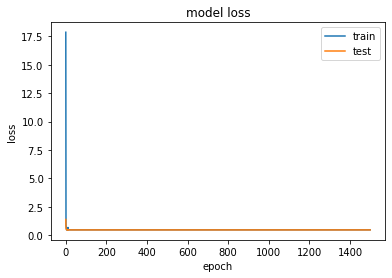

In [26]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

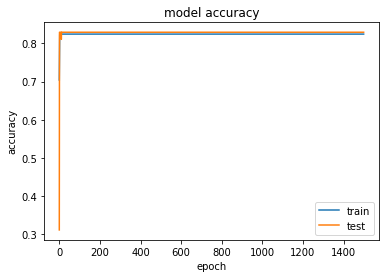

In [27]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

In [28]:
from pycm import ConfusionMatrix
from sklearn.metrics import plot_confusion_matrix, classification_report


print("Report : ", classification_report(y_test_encoded, y_pred_classes))

print(ConfusionMatrix(actual_vector=list(y_test_encoded),predict_vector=list(y_pred_classes)))

Report :                precision    recall  f1-score   support

           0       0.83      1.00      0.91       355
           1       0.00      0.00      0.00        73

    accuracy                           0.83       428
   macro avg       0.41      0.50      0.45       428
weighted avg       0.69      0.83      0.75       428

Predict   0         1         
Actual
0         355       0         

1         73        0         





Overall Statistics : 

95% CI                                                            (0.79381,0.86507)
ACC Macro                                                         0.82944
ARI                                                               0.0
AUNP                                                              0.5
AUNU                                                              0.5
Bangdiwala B                                                      0.82944
Bennett S                                                         0.65888
CBA               